In [1]:
## Importing packages

# This R environment comes with all of CRAN and many other helpful packages preinstalled.
# You can see which packages are installed by checking out the kaggle/rstats docker image: 
# https://github.com/kaggle/docker-rstats

library(tidyverse) # metapackage with lots of helpful functions

## Running code

# In a notebook, you can run a single code cell by clicking in the cell and then hitting 
# the blue arrow to the left, or by clicking in the cell and pressing Shift+Enter. In a script, 
# you can run code by highlighting the code you want to run and then clicking the blue arrow
# at the bottom of this window.

## Reading in files

# You can access files from datasets you've added to this kernel in the "../input/" directory.
# You can see the files added to this kernel by running the code below. 

list.files(path = "../input")

## Saving data

# If you save any files or images, these will be put in the "output" directory. You 
# can see the output directory by committing and running your kernel (using the 
# Commit & Run button) and then checking out the compiled version of your kernel.



── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1.9000     ✔ purrr   0.2.4     
✔ tibble  1.4.2          ✔ dplyr   0.7.4     
✔ tidyr   0.8.0          ✔ stringr 1.2.0     
✔ readr   1.2.0          ✔ forcats 0.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


[1] "gender_submission.csv" "test.csv"              "train.csv"

Load all our datasets:

In [2]:
train <- read_csv("../input/train.csv")
test <-read_csv("../input/test.csv")
gender<-read_csv("../input/gender_submission.csv")

Parsed with column specification:
cols(
  PassengerId = col_double(),
  Survived = col_double(),
  Pclass = col_double(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_double(),
  Parch = col_double(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character()
)
Parsed with column specification:
cols(
  PassengerId = col_double(),
  Pclass = col_double(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_double(),
  Parch = col_double(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character()
)
Parsed with column specification:
cols(
  PassengerId = col_double(),
  Survived = col_double()
)


Take a look at what data we have. Make a new dataframe keeping only the fields that are likely to be useful to a first analysis. Name, ticket number, and cabin number could all potentially contain information that codes for relative wealth (which may affect survivability), but the relation (if any) is likely too subtle to be extracted from small dataset we have available, and we already have a field recording the passengers' socioeconomic class. In any case, we can set these fields aside for our first analysis. Additionally, we see that 687 of the 891 observations we have available do not even have a cabin number recorded, so this field is unlikely to be useful. 

In [3]:
str(train)
head(train)
No_cabin<-train%>%filter(is.na(Cabin))%>%summarize(count = n())
No_cabin

useful<- train[,c("PassengerId", "Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked")]
head(useful)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	891 obs. of  12 variables:
 $ PassengerId: num  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : num  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : num  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : num  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : num  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  NA "C85" NA "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...
 - attr(*, "spec")=
  .. cols(
  ..   PassengerId = col_double(),
  ..   Survived = col_double(),
  ..   Pclass = col_double(),
  ..   Name = col_character(),
  ..   Sex = col_character(),
  ..   Age = c

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q


count
687


PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,0,3,male,22,1,0,7.2500,S
2,1,1,female,38,1,0,71.2833,C
3,1,3,female,26,0,0,7.9250,S
4,1,1,female,35,1,0,53.1000,S
5,0,3,male,35,0,0,8.0500,S
6,0,3,male,NA,0,0,8.4583,Q


Let's look for which fields still have NA values, and decide how to deal with them.

In [4]:
#Generate counts for NA in each of the remaining fields
length(which(is.na(useful$Pclass)))
length(which(is.na(useful$Sex)))
length(which(is.na(useful$Age)))
length(which(is.na(useful$SibSp)))
length(which(is.na(useful$Parch)))
length(which(is.na(useful$Fare)))
length(which(is.na(useful$Embarked)))

#Find the most common embarkation point, in case it will be sensible to replace missing values with it. 
useful%>%group_by(Embarked)%>%summarize(n())

[1] 0

[1] 0

[1] 177

[1] 0

[1] 0

[1] 0

[1] 2

Embarked,n()
C,168
Q,77
S,644
NA,2


It looks like we're missing only 2 embarkation points, which is not a big deal. If we want to use Embark as a variable in our analysis, we can either throw those observations away, or play the odds and bet that they embarked at Southampton (where roughly 72% of passengers did). The more pressing problem is the 177 rows with missing ages. Let's look at the distribution of ages that we do have to see what next steps to take. A priori it feels like age might be a good determiner of survival (to the extant that it correlates to athletic fitness, or a desire to prioritize saving children, etc), but 177/891 is roughly 20% of our dataset. It would be a shame to have to ignore it. 

[1]  0.42 80.00

PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
804,1,3,male,0.42,0,1,8.5167,C


[1] 28

[1] 29.69912

Warning message:
“Removed 177 rows containing non-finite values (stat_bin).”

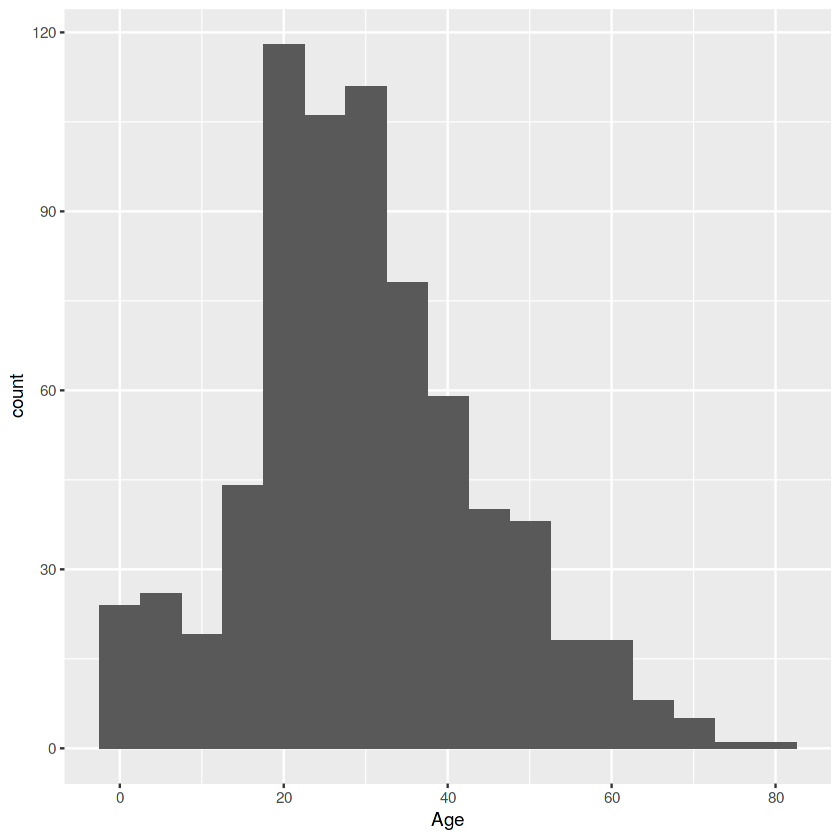

In [5]:
range(useful$Age, na.rm=TRUE) #it looks like there are a wide range of ages, including a baby of around 5 months
useful%>%filter(Age==0.42) #phew,the baby survived!

median(useful$Age, na.rm=TRUE)
mean(useful$Age, na.rm=TRUE)



ggplot(useful, aes(x=Age))+geom_histogram(binwidth=5)


The age distribution seems to be pretty concentrated around the high 20's/low 30's. The median is 28 and the mean is almost 30. Let's try just replacing the missing values with the mean, and seeing what kind of performance we get. 

In [6]:
#Replace NA is Embarked with Southampton
useful_no_na<-useful
useful_no_na$Embarked[which(is.na(useful_no_na$Embarked))]<-"S"

#Replace NA in Age with mean age of other passengers
useful_no_na$Age[which(is.na(useful_no_na$Age))]<-mean(useful_no_na$Age, na.rm=TRUE)


For our first attempt at logistic regression, we can just try using all the fields we haven't eliminated so far.

In [7]:
model1 <-glm(Survived ~ ., family = "binomial", data = useful_no_na)


Let's see how the test set is in terms of missing ages

In [8]:
length(which(is.na(test$Age))) #=86, which isn't great

mean(test$Age, na.rm=1) 
#but the mean is also around 30, so replacing the missing ages with the mean here doesn't make the test distribution too far from the training one

test_no_na <- test
test_no_na$Age[which(is.na(test$Age))]<-mean(test$Age, na.rm=1)


[1] 86

[1] 30.27259

In [9]:
test_pred1<- predict(model1, newdata= test_no_na, type = "response")

In [10]:
#Check how many rows in the test data were missing the other fields we chose to use

length(which(is.na(test_pred1))) #looks like we're just missing data for 1 point. Let's see what it is. 


which(is.na(test_pred1))
test_no_na[153,]

[1] 1

153 
153

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NA,NA,S


We're missing Mr. Storey's fare. Since it's just one value, let's replace it with the median fare (for his reported class) to guess whether or not he survived. 

In [11]:
class3fare<-test_no_na%>%filter(Pclass==3)%>%summarize(median(Fare, na.rm=1))
test_no_na[153,"Fare"]<- class3fare
test_no_na[153,]

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,7.8958,NA,S


And run our prediction again.

In [12]:
test_pred1<- predict(model1, newdata= test_no_na, type = "response")
head(test_pred1)

1         2         3         4         5         6 
0.1100789 0.3625325 0.1114303 0.1022216 0.5845262 0.1603544

Now to prepare the submission. Let's use a basic cutoff of 0.5. 

In [13]:
submission<-test["PassengerId"]
submission<-submission%>%mutate(Survived = as.integer(test_pred1>=0.5))
head(submission)


PassengerId,Survived
892,0
893,0
894,0
895,0
896,1
897,0


Let's just do a quick sanity check that we're saving roughly the right proportion, according to the distribution in our training set

In [14]:
submission%>%filter(Survived ==1)%>%summarize(Test_survive_pct = n()/nrow(submission))

train%>%filter(Survived==1)%>%summarize(Train_survive_pct = n()/nrow(train))



Test_survive_pct
0.3803828


Train_survive_pct
0.3838384


Looks about right. Let's try it and see. 

In [15]:
submission<-submission%>%mutate(PassengerId = as.integer(PassengerId))
write_csv(submission, "submission1.csv")

Our first submission is about 74% accurate. Not great, but better than guessing, and not too awful for what was just a first pass using all the data that might be relevant. From here, there are a number of things to try to get an improvement:

1.)  Change the variables we use in the regression (probably the first thing to try is to just drop the age field and see if we do any better, since that's the one we fiddled with before)

2.) Change the way we convert our predicted chance of surival into concrete guesses. We saw above that only 38% of the passengers in the training set actually surived. We can try playing around with the cutoff or some other way of selecting survival guesses, but our first pass did get us pretty close to what we believe the underlying distribution is (assuming it's the same as our training data), so it's likely that working on assigning the predicted percentages more accurately will be more fruitful.

3.) Choose a different model. We're predicting a binary outcome, so we can take a look at a decision tree model as well, and see how that does. 

We'll start with a combination of 1.) and 2.), since that's just a small adjustment from where we already are .

In [16]:
#Look at a summary of the model we started with

summary(model1)



Call:
glm(formula = Survived ~ ., family = "binomial", data = useful_no_na)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6415  -0.5848  -0.4210   0.6249   2.4464  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.245e+00  5.851e-01   8.963  < 2e-16 ***
PassengerId  9.491e-05  3.488e-04   0.272  0.78553    
Pclass      -1.101e+00  1.437e-01  -7.664 1.80e-14 ***
Sexmale     -2.731e+00  2.011e-01 -13.579  < 2e-16 ***
Age         -3.968e-02  7.838e-03  -5.063 4.12e-07 ***
SibSp       -3.251e-01  1.096e-01  -2.966  0.00302 ** 
Parch       -9.702e-02  1.192e-01  -0.814  0.41554    
Fare         1.969e-03  2.388e-03   0.824  0.40974    
EmbarkedQ   -3.141e-02  3.822e-01  -0.082  0.93450    
EmbarkedS   -4.138e-01  2.370e-01  -1.746  0.08076 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1186.66  on 890  degrees of freedom
Residual

It looks like the most significant variables according to our first naive model are Class, Sex, Age, and Siblings/Spouses. (It's unfortunate that this includes age, since we know some of those values were inserted by us). Let's try a model where we limit ourselves to just those variables. 

In [17]:
model2<-glm(Survived~Pclass+Sex+Age+SibSp, family = "binomial", data = useful_no_na)
summary(model2)


Call:
glm(formula = Survived ~ Pclass + Sex + Age + SibSp, family = "binomial", 
    data = useful_no_na)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6869  -0.6055  -0.4169   0.6111   2.4547  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.191976   0.478346  10.854  < 2e-16 ***
Pclass      -1.172391   0.119725  -9.792  < 2e-16 ***
Sexmale     -2.739806   0.194142 -14.112  < 2e-16 ***
Age         -0.039793   0.007755  -5.131 2.88e-07 ***
SibSp       -0.357788   0.104033  -3.439 0.000583 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1186.66  on 890  degrees of freedom
Residual deviance:  790.84  on 886  degrees of freedom
AIC: 800.84

Number of Fisher Scoring iterations: 5


And now let's make some predictions with the new model and see how they look. 

In [18]:
test_pred2 = predict(model2, newdata= test_no_na, type = "response")
head(test_pred2)


submission2<-test["PassengerId"]
submission2<-submission2%>%mutate(PassengerId = as.integer(PassengerId))%>%mutate(Survived = as.integer(test_pred2>=0.5))
head(submission2)

submission2%>%filter(Survived==1)%>%summarize(Test_survive_pct = n()/nrow(submission2))

1          2          3          4          5          6 
0.08033032 0.36510740 0.08629086 0.10532416 0.60863186 0.16491443

PassengerId,Survived
892,0
893,0
894,0
895,0
896,1
897,0


Test_survive_pct
0.3875598


These predictions also look reasonable. We went from 38.0% survival to 38.8%, which is slightly nicer for the passengers, but is still in the realm of 38.3% that we have for our training set. Let's load it up and see how we do. 

In [19]:
write_csv(submission2, "submission2.csv")

Well, exactly the same performance, 74.6%. Let's try taking Age out of the model.

In [20]:
model3<-glm(Survived~Pclass+Sex+SibSp, family = "binomial", data = useful_no_na)
summary(model3)
test_pred3<-predict(model3, newdata = test_no_na, type= "response")
head(test_pred3)

submission3<-test["PassengerId"]%>%mutate(PassengerId = as.integer(PassengerId))%>%mutate(Survived = as.integer(test_pred3>=0.50))
submission3%>%filter(Survived ==1)%>%summarize(Test_survive_pct = n()/nrow(submission3))
write_csv(submission3, "submission3.csv")


Call:
glm(formula = Survived ~ Pclass + Sex + SibSp, family = "binomial", 
    data = useful_no_na)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2689  -0.6735  -0.4747   0.6189   2.5148  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.43357    0.30543  11.242  < 2e-16 ***
Pclass      -0.93896    0.10647  -8.819  < 2e-16 ***
Sexmale     -2.74314    0.19027 -14.417  < 2e-16 ***
SibSp       -0.24812    0.09453  -2.625  0.00867 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1186.66  on 890  degrees of freedom
Residual deviance:  819.32  on 887  degrees of freedom
AIC: 827.32

Number of Fisher Scoring iterations: 4


1         2         3         4         5         6 
0.1065529 0.5911129 0.2337090 0.1065529 0.5911129 0.1065529

Test_survive_pct
0.3564593


77%! Progress! Looks like either Age wasn't a helpful predictor, or the fact that we had to guess at missing values for around 20% of the passengers undermined what the Age variable would have told us. One last thing to try, if we really think Age might be a useful predictor (and again, it seems pretty reasonable, at least naively), is to replace the missing Ages with some other, non-NA character, so we can still generate predictions for those with age values listed, and maybe not skew survival percentages for those near the median age. 

In [21]:
# Create new data frames with "none" category for unknown ages. 
useful_na_age<-useful
useful_na_age[which(is.na(useful$Age)), "Age"]<-"none"
head(useful_na_age)

test_na_age<-test
test_na_age[which(is.na(test$Age)), "Age"]<-"none"


PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,0,3,male,22,1,0,7.2500,S
2,1,1,female,38,1,0,71.2833,C
3,1,3,female,26,0,0,7.9250,S
4,1,1,female,35,1,0,53.1000,S
5,0,3,male,35,0,0,8.0500,S
6,0,3,male,none,0,0,8.4583,Q


In [22]:
#Make a new model and get its predictions
model4<-glm(Survived~Pclass +Sex+Age+SibSp, family = "binomial", data= useful_na_age)
summary(model4)



Call:
glm(formula = Survived ~ Pclass + Sex + Age + SibSp, family = "binomial", 
    data = useful_na_age)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5900  -0.5366  -0.3118   0.4795   2.6770  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)   24.2121  3956.1804   0.006    0.995    
Pclass        -1.1717     0.1332  -8.798  < 2e-16 ***
Sexmale       -3.1308     0.2316 -13.520  < 2e-16 ***
Age0.67       -0.6166  5594.8839   0.000    1.000    
Age0.75       -2.0206  4845.3116   0.000    1.000    
Age0.83       -0.8675  4836.1907   0.000    1.000    
Age0.92       -1.7884  5594.8839   0.000    1.000    
Age1         -16.0676  3956.1805  -0.004    0.997    
Age10        -37.0064  4479.9514  -0.008    0.993    
Age11        -19.2662  3956.1806  -0.005    0.996    
Age12          0.5551  5594.8839   0.000    1.000    
Age13         -3.6185  4794.6667  -0.001    0.999    
Age14        -19.9001  3956.1805  -0.005    0.996    
Age14.5

In [23]:

#test_pred4<-predict(model4, newdata = test_na_age, type = "response")
#head(test_pred4)

Well, here we run into an error, and if we examine the summary of the model above, we see that apart from missing some values the Age data is troublesome because once we start treating the Age field as a character, the ages that occur in the test set but not in the training set have no match and so the model doesn't know what to do with them. Exacerbating the problems is the fact that many passengers gave their ages as fraction, so there are even more possible values for the field. This is acceptable for infants, where it makes sense to keep track of their age in months, and I suppose we might let it slide for children who want to feel older and so tack on the extra half-year they've earned, but there are grown people listing their ages as 38 and a half. This is madness. 

We could try just rounding all the fractions off (it seems unlikely that the difference of a few months in age would affect survival rates), but the ages 67 and 76 are whole number ages that happen to occur in the test set and not the training set, so we still wouldn't get a prediction on these passengers with this approach. In the interests of fixing this problem and also cleaning up the data, it probably makes more sense to just group the different ages into a few separate bins. This has the benefit of letting us use data about, say, 31-year-old passengers to contribute to predicting the survival rates of 32-year-old passengers. We'll do this clean-up in the next cell, using bins of 10 year increments as a start. 

In [24]:
#Write a function that, for a given bin size, assigns each Age value to a bin named by the range of the bin

bin_namer <-function(x, binsize){
    midpoint<-binsize/2+(binsize*floor(x/binsize))
    boxname<-paste(as.character(binsize*floor(midpoint/binsize)),"-", as.character(binsize*ceiling(midpoint/binsize)))
    return(boxname)
}
            
        
useful_age_bin<-useful%>%mutate(Age_bin = bin_namer(Age, 10))
       head(useful_age_bin)
test_age_bin<-test%>%mutate(Age_bin = bin_namer(Age, 10))
       head(test_age_bin)

PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_bin
1,0,3,male,22,1,0,7.2500,S,20 - 30
2,1,1,female,38,1,0,71.2833,C,30 - 40
3,1,3,female,26,0,0,7.9250,S,20 - 30
4,1,1,female,35,1,0,53.1000,S,30 - 40
5,0,3,male,35,0,0,8.0500,S,30 - 40
6,0,3,male,NA,0,0,8.4583,Q,NA - NA


PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NA,Q,30 - 40
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NA,S,40 - 50
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NA,Q,60 - 70
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NA,S,20 - 30
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NA,S,20 - 30
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NA,S,10 - 20


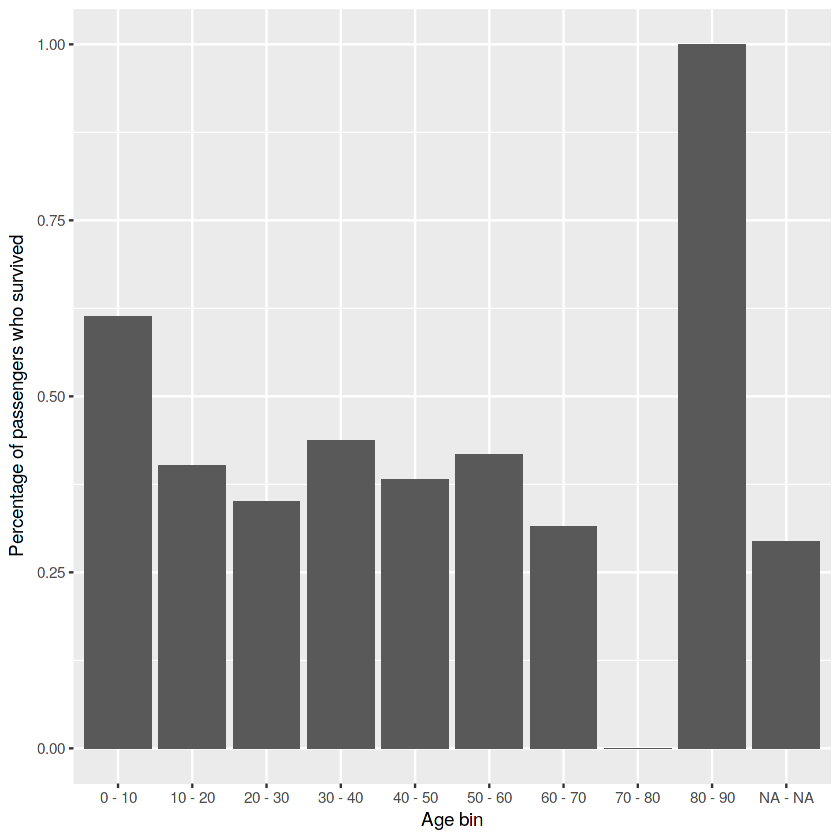

In [25]:
#Check how the survival chances look by age bin

bin_groups<-useful_age_bin%>%group_by(Age_bin)%>%summarize(Percent_survived = length(which(Survived ==1))/n())
ggplot(bin_groups, aes(x=Age_bin, y=Percent_survived))+geom_col()+labs(x="Age bin", y="Percentage of passengers who survived")


Looks like the one 80-year-old in our training set survived, which is giving that bin pretty good odds of survival. That might skew the guesses for passengers in the test set in the same bin, if Age_bin ends up being an important variable. Now that we've got the age bins set up, let's see what kind of model they give us. 

In [26]:
#Construct the model
model4<-glm(Survived~Pclass +Sex+Age_bin+SibSp, family = "binomial", data= useful_age_bin)
summary(model4)

#Get the predictions
test_pred4<-predict(model4, newdata = test_age_bin, type = "response")
head(test_pred4)

#Prepare the submission
submission4<-test["PassengerId"]%>%mutate(PassengerId = as.integer(PassengerId))%>%mutate(Survived = as.integer(test_pred4>=0.50))
submission4%>%filter(Survived ==1)%>%summarize(Test_survive_pct = n()/nrow(submission4))
write_csv(submission4, "submission4.csv")



Call:
glm(formula = Survived ~ Pclass + Sex + Age_bin + SibSp, family = "binomial", 
    data = useful_age_bin)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9785  -0.6053  -0.4390   0.5818   2.5736  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)       6.0334     0.5772  10.452  < 2e-16 ***
Pclass           -1.1178     0.1203  -9.294  < 2e-16 ***
Sexmale          -2.8028     0.1984 -14.127  < 2e-16 ***
Age_bin10 - 20   -1.9771     0.4749  -4.163 3.14e-05 ***
Age_bin20 - 30   -2.1074     0.4373  -4.819 1.45e-06 ***
Age_bin30 - 40   -1.9796     0.4476  -4.422 9.77e-06 ***
Age_bin40 - 50   -2.5574     0.4917  -5.201 1.98e-07 ***
Age_bin50 - 60   -2.8898     0.5696  -5.073 3.91e-07 ***
Age_bin60 - 70   -3.0127     0.7203  -4.182 2.88e-05 ***
Age_bin70 - 80  -16.8703   547.0957  -0.031    0.975    
Age_bin80 - 90   13.4532  1455.3976   0.009    0.993    
Age_binNA - NA   -2.1685     0.4484  -4.836 1.32e-06 ***
SibSp            

1          2          3          4          5          6 
0.10887127 0.40877478 0.11736308 0.09707463 0.52022680 0.10911311

Test_survive_pct
0.3803828


Well, back down to 74.6%. Let's try slightly smaller bins. Say, of width 5 years. 

In [27]:
useful_age_bin5<-useful%>%mutate(Age_bin = bin_namer(Age, 5))
       head(useful_age_bin5)
test_age_bin5<-test%>%mutate(Age_bin = bin_namer(Age, 5))
       head(test_age_bin5)


PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_bin
1,0,3,male,22,1,0,7.2500,S,20 - 25
2,1,1,female,38,1,0,71.2833,C,35 - 40
3,1,3,female,26,0,0,7.9250,S,25 - 30
4,1,1,female,35,1,0,53.1000,S,35 - 40
5,0,3,male,35,0,0,8.0500,S,35 - 40
6,0,3,male,NA,0,0,8.4583,Q,NA - NA


PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NA,Q,30 - 35
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NA,S,45 - 50
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NA,Q,60 - 65
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NA,S,25 - 30
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NA,S,20 - 25
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NA,S,10 - 15


PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NA,Q,30 - 35
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NA,S,45 - 50
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NA,Q,60 - 65
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NA,S,25 - 30
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NA,S,20 - 25
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NA,S,10 - 15


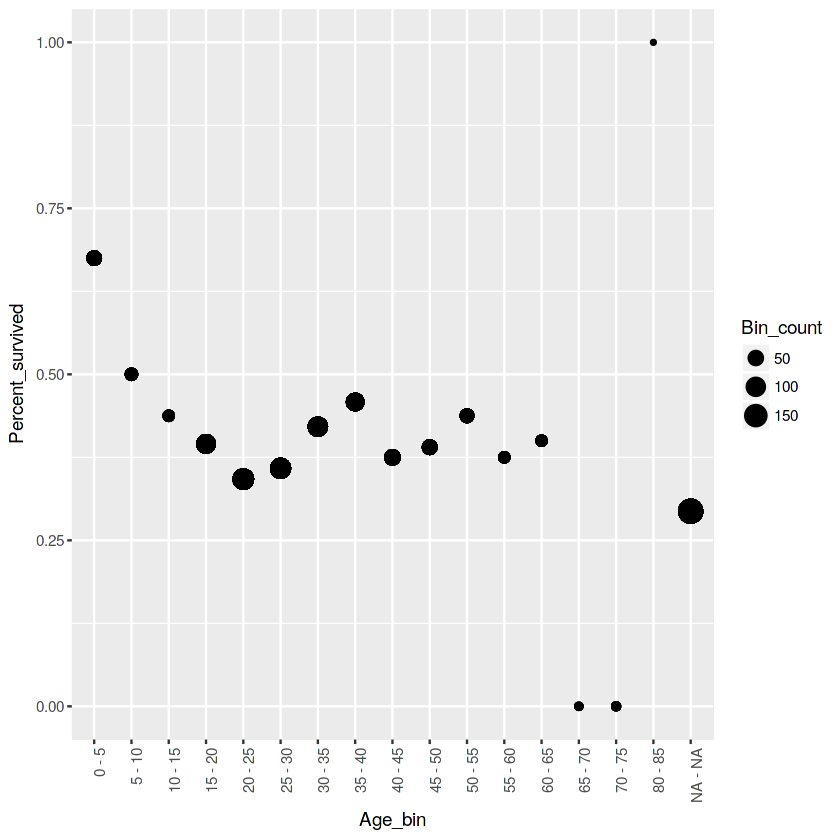

In [28]:
#Treat our Age_bin variable as an ordered factor
factored_age_bin5<-useful_age_bin5
ages<- c("0 - 5","5 - 10","10 - 15", "15 - 20","20 - 25", "25 - 30","30 - 35", "35 - 40", "40 - 45", "45 - 50", "50 - 55", "55 - 60", "60 - 65", "65 - 70", "70 - 75", "75 - 80", "80 - 85", "NA - NA" )
factored_age_bin5$Age_bin<-factor(useful_age_bin5$Age_bin, ordered = TRUE, levels = ages)
factored_age_bin5$Survived<-factor(factored_age_bin5$Survived, levels = c("0", "1"))


test_age_bin5<-test%>%mutate(Age_bin = bin_namer(Age, 5))
       head(test_age_bin5)
test_age_bin5$Age_bin<-factor(test_age_bin5$Age_bin, ordered = TRUE, levels = ages)



bin_groups<-factored_age_bin5%>%group_by(Age_bin)%>%mutate(Percent_survived = length(which(Survived ==1))/n())%>%mutate(Bin_count = n())
ggplot(bin_groups, aes(x=Age_bin, y = Percent_survived, size = Bin_count))+geom_point()+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

One concern we notice from the plot above: Our training data contained no passenger in the 75-80 bin. If the test set has such a passenger, the prediction won't know what to do with him or her. We'll need to sort this out

In [29]:
test_age_bin5%>%filter(Age_bin=="75 - 80") #See if there are such passengers

#Unfortunately, there is one. 
useful_age_bin5%>%filter(Age_bin=="70 - 75") #We've got 6 passengers in the training set in bin 70-75, so let's try just throwing Mrs. Cavendish in that bin

which(test_age_bin5$Age_bin == "75 - 80")
test_age_bin5[97, "Age_bin"]<-"70 - 75"

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin
988,1,"Cavendish, Mrs. Tyrell William (Julia Florence Siegel)",female,76,1,0,19877,78.85,C46,S,75 - 80


PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_bin
97,0,1,male,71.0,0,0,34.6542,C,70 - 75
117,0,3,male,70.5,0,0,7.7500,Q,70 - 75
494,0,1,male,71.0,0,0,49.5042,C,70 - 75
673,0,2,male,70.0,0,0,10.5000,S,70 - 75
746,0,1,male,70.0,1,1,71.0000,S,70 - 75
852,0,3,male,74.0,0,0,7.7750,S,70 - 75


[1] 97

In [30]:
#Now build the model and predictions

model5<-glm(Survived~Pclass +Sex+Age_bin+SibSp, family = "binomial", data= useful_age_bin5)
summary(model5)

#Get predictions
test_pred5<-predict(model5, newdata = test_age_bin5, type = "response")

#Generate submission
submission5<-test["PassengerId"]%>%mutate(PassengerId = as.integer(PassengerId))%>%mutate(Survived = as.integer(test_pred5>=0.50))
submission5%>%filter(Survived ==1)%>%summarize(Test_survive_pct = n()/nrow(submission5))
write_csv(submission5, "submission5.csv")




Call:
glm(formula = Survived ~ Pclass + Sex + Age_bin + SibSp, family = "binomial", 
    data = useful_age_bin5)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1404  -0.5918  -0.4129   0.5523   2.5820  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)       6.5439     0.6543  10.001  < 2e-16 ***
Pclass           -1.1261     0.1223  -9.209  < 2e-16 ***
Sexmale          -2.8350     0.2012 -14.089  < 2e-16 ***
Age_bin10 - 15   -2.2495     0.8396  -2.679  0.00738 ** 
Age_bin15 - 20   -2.4883     0.5719  -4.351 1.35e-05 ***
Age_bin20 - 25   -2.7497     0.5591  -4.918 8.74e-07 ***
Age_bin25 - 30   -2.4162     0.5522  -4.376 1.21e-05 ***
Age_bin30 - 35   -2.2834     0.5573  -4.097 4.18e-05 ***
Age_bin35 - 40   -2.6588     0.5867  -4.532 5.84e-06 ***
Age_bin40 - 45   -2.9407     0.6420  -4.580 4.64e-06 ***
Age_bin45 - 50   -3.1121     0.6287  -4.950 7.41e-07 ***
Age_bin5 - 10    -1.2518     0.7252  -1.726  0.08434 .  
Age_bin50 - 55  

Test_survive_pct
0.3708134


Well, 74.6% again. Looks like all this fiddling around with age isn't getting us any better at predicting (the best result so far was when we dropped the Age field altogether). Let's try staying with that strategy, but doing some more complicated regression techniques, to see if we can't squeeze some more juice out of it.  In particular, we'll split our training set into pieces and build several models to cross validate. Hopefully when we average our separate models together their teamwork will give better predictions.

In [31]:
#Selecting Cross Validation Sets
set.seed(100)
permutation<-sample(nrow(train))
permuted_train<-train[permutation,]

#Now we've put our training set into a random order. If we just separate it into thirds, each will be randomly selected relative to the other two. 
#Then we can use each two to train a model predicting the third, and average these models together for the test.

train1<-permuted_train[1:(nrow(train)/3),]
train2<-permuted_train[((nrow(train)/3)+1):(2*nrow(train)/3),]
train3<-permuted_train[((2*nrow(train)/3)+1):nrow(train), ]
head(train3)

train12<-bind_rows(train1, train2)
train13<-bind_rows(train1, train3)
train23<-bind_rows(train2, train3)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
529,0,3,"Salonen, Mr. Johan Werner",male,39,0,0,3101296,7.9250,NA,S
277,0,3,"Lindblom, Miss. Augusta Charlotta",female,45,0,0,347073,7.7500,NA,S
315,0,2,"Hart, Mr. Benjamin",male,43,1,1,F.C.C. 13529,26.2500,NA,S
465,0,3,"Maisner, Mr. Simon",male,NA,0,0,A/S 2816,8.0500,NA,S
28,0,1,"Fortune, Mr. Charles Alexander",male,19,3,2,19950,263.0000,C23 C25 C27,S
61,0,3,"Sirayanian, Mr. Orsen",male,22,0,0,2669,7.2292,NA,C


Now, the model that has done the best so far used just Pclass, Sex, and SibSp to predict the chances of a passenger surviving, so we'll use the same model for each pair of thirds of our training set. 

In [32]:
cvmodel12<-glm(Survived~Pclass+Sex+SibSp, family = "binomial", data = train12)
cvmodel13<-glm(Survived~Pclass+Sex+SibSp, family = "binomial", data = train13)
cvmodel23<-glm(Survived~Pclass+Sex+SibSp, family = "binomial", data = train23)

In [33]:
#Make the predictions for the missing data from each model.
pred12<- predict(cvmodel12, newdata = train3, type = "response")
pred13<-predict(cvmodel13, newdata = train2, type = "response")
pred23<- predict(cvmodel23, newdata = train1, type = "response")

threshold<-0.6
prediction12<-ifelse(pred12>=threshold, 1, 0)
prediction13<-ifelse(pred13>=threshold, 1, 0)
prediction23<-ifelse(pred23>=threshold, 1, 0)

In [34]:
#Let's see how the predictions are working out
conf1<-table(train1$Survived, prediction23)
conf2<-table(train2$Survived, prediction13)
conf3<-table(train3$Survived, prediction12)

conf1
conf2
conf3

accuracy12<-sum(diag(conf3))/sum(conf3)
accuracy13<-sum(diag(conf2))/sum(conf2)
accuracy23<-sum(diag(conf1))/sum(conf1)

c(accuracy12, accuracy13, accuracy23)

   prediction23
      0   1
  0 167  13
  1  42  75

   prediction13
      0   1
  0 159  23
  1  46  69

   prediction12
      0   1
  0 174  13
  1  40  70

[1] 0.8215488 0.7676768 0.8148148

All pretty good accuracies! Let's try averaging their guesses about the test set together, and see if that helps at all. 

In [35]:
test_pred12<-predict(cvmodel12, newdata=test, type="response")
test_pred13<-predict(cvmodel13,, newdata=test, type="response")
test_pred23<-predict(cvmodel23, newdata=test, type="response")

test_pred6<- rowMeans(cbind(test_pred12, test_pred13, test_pred23))
head(test_pred6)

submission6<-test["PassengerId"]%>%mutate(Survived = as.integer(test_pred6>=0.5), PassengerId = as.integer(PassengerId))

submission6%>%filter(Survived ==1)%>%summarize(n()/nrow(submission6))
write_csv(submission6, "submission6.csv")

1         2         3         4         5         6 
0.1061626 0.5910676 0.2334918 0.1061626 0.5910676 0.1061626

n()/nrow(submission6)
0.3564593


77%. Exactly as good as without the cross validation. In fact, let's check if the predictions were different from what we got without the cross validation (we maybe should have done this before submitting, but submitting doesn't really cost us anything either). 

In [36]:
length(which(submission3$Survived !=submission6$Survived))

[1] 0

Exactly the same! We can try increasing the number of folds (and checking whether anything is changing before we submit), and if necessary, break out the big guns of leave-one-out cross validation. 

In [37]:
#Separate the set into pieces. We'll write actual functions to do it this time. 

separate<-function(df, n){
    pieces<-vector("list",n)
    rows<-nrow(df)
    width<-floor(nrow(df)/n) #if n does not evenly divide the number of rows in the dataframe, the last piece will be bigger
    for(i in 1:(n-1)){  
        pieces[[i]] <- df[(((i-1)*width)+1):(i*width),]
        }
    pieces[[n]]<-df[(((n-1)*width)+1):(nrow(df)),]

    return(pieces)   
    }

bind<-function(pieces){
    n<-length(pieces)
    clumps<-vector("list", n)
    for(i in (1:n)){
        clumps[[i]]<-bind_rows(pieces[c(-i)])
    }
    return(clumps)    
}



In [38]:
#Now we write functions to build the models from the clumps to predict the pieces.

build_models<-function(clumps){
    clump_models<-vector("list", length(clumps))
    for(i in (1:length(clumps))){
        clump_models[[i]]<-glm(Survived~Pclass+Sex+SibSp, family = "binomial", data = clumps[[i]])
    }
    return(clump_models)
}


get_predictions<-function(clump_models, pieces){
    n<- length(pieces)
    predictions<-vector("list", n)
    for(i in (1:n)){
        predictions[[i]]<-predict(clump_models[[i]], newdata = pieces[[i]], type = "response")
    
        
    }  
    return(predictions)
   
}
        
        
        

Let's try using 10 pieces, just to see if that gets us any better. If not, we'll jump up to leave-one-out, and then maybe some stronger techniques.

In [39]:
#Now we actually do the separating and modelling

#Get a random ordering of the training set
set.seed(101)
permutation<-sample(nrow(train))
permuted_train<-train[permutation,]


pieces<-separate(permuted_train,10)
clumps<-bind(pieces)
clump_models<-build_models(clumps)
predicted_chances<-get_predictions(clump_models, pieces)



In [40]:
threshold<- 0.5
predictions<-vector("list", length(predicted_chances))
for(i in (1:length(predicted_chances))){
    predictions[[i]]<-ifelse(predicted_chances[[i]]>=threshold, 1, 0)
}

In [41]:
conf<-vector("list", length(predictions))
for(i in (1:length(conf))){
    conf[[i]]<-table(pieces[[i]]$Survived, predictions[[i]])
}

accuracy<-(1:length(conf))
for(i in 1:length(conf)){
    accuracy[i]<-sum(diag(conf[[i]]))/sum(conf[[i]])
}

accuracy

[1] 0.8089888 0.7752809 0.8539326 0.8089888 0.7752809 0.8202247 0.8089888
 [8] 0.7977528 0.7752809 0.7777778

In [42]:
#Make predictions on the test set and put them together
test_predict<-function(clump_models){
    test_pred<-vector("list", length(clump_models))
    for(i in 1:length(test_pred)){
        test_pred[[i]]<-predict(clump_models[[i]], newdata = test, type = "response")
    }
    return(test_pred)
}

test_pred<-test_predict(clump_models)
pred_matrix<-test_pred[[1]]

for(i in 2:length(test_pred)){
    pred_matrix<-cbind(pred_matrix, test_pred[[i]])
}

test_pred7<-rowMeans(pred_matrix)
head(test_pred7)

submission7<-test["PassengerId"]%>%mutate(Survived = as.integer(test_pred7>=0.5), PassengerId = as.integer(PassengerId))

submission7%>%filter(Survived ==1)%>%summarize(n()/nrow(submission7))
write_csv(submission7, "submission7.csv")

head(submission7)

length(which(submission7$Survived!=submission3$Survived))


1         2         3         4         5         6 
0.1065622 0.5910684 0.2337242 0.1065622 0.5910684 0.1065622

n()/nrow(submission7)
0.3564593


PassengerId,Survived
892,0
893,1
894,0
895,0
896,1
897,0


[1] 0

Alright, let's try leave-one-out cross-validation. We'll use the package "caret."

In [43]:
library(caret)

trainf<-train
trainf$Survived<-as.factor(trainf$Survived)
str(trainf)
loomodel<-train(Survived ~ Pclass+Sex+SibSp, method = "glm", data = trainf, trControl = trainControl(method = "LOOCV"))

Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift



Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	891 obs. of  12 variables:
 $ PassengerId: num  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass     : num  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : num  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : num  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  NA "C85" NA "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...
 - attr(*, "spec")=
  .. cols(
  ..   PassengerId = col_double(),
  ..   Survived = col_double(),
  ..   Pclass = col_double(),
  ..   Name = col_character(),
  ..   Sex = col_char

In [44]:
test_pred8<-predict(loomodel, newdata = test, type= "raw")
head(test_pred8)

test_pred8<-matrix(as.integer(test_pred8), ncol = 1)
test_pred8<-test_pred8 -1
head(test_pred8)
submission8<-test["PassengerId"]%>%mutate(PassengerId = as.integer(PassengerId), Survived = test_pred8)
head(submission8)
length(which(submission8$Survived!=submission3$Survived))

write_csv(submission8, "submission8.csv")

[1] 0 1 0 0 1 0
Levels: 0 1

0
1
0
0
1
0


PassengerId,Survived
892,0
893,1
894,0
895,0
896,1
897,0


[1] 0

OK. Enough of logistic regression. Let's try a decision tree model and see where that gets us.

In [45]:
train_tree<-train%>%mutate(Survived = as.factor(ifelse(Survived==1,"Survived", "Died")))%>%mutate(Sex = as.factor(Sex))
train_tree$Embarked[which(is.na(train_tree$Embarked))]<-"S"
train_tree<-train_tree%>%mutate(Embarked = as.factor(Embarked))
head(train_tree)
str(train_tree)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,Died,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,Survived,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,Died,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S
6,Died,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q


Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	891 obs. of  12 variables:
 $ PassengerId: num  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : Factor w/ 2 levels "Died","Survived": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass     : num  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : num  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : num  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  NA "C85" NA "C123" ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 3 1 3 3 3 2 3 3 3 1 ...


Let's reexamine Fare as a potentially useful variable. It probably correclates pretty closely to socio-economic class, so maybe it's not telling us much we don't already know more succintly, but it might also provide a finer distinction of wealth level within the 3 rough classes we get from the data. 

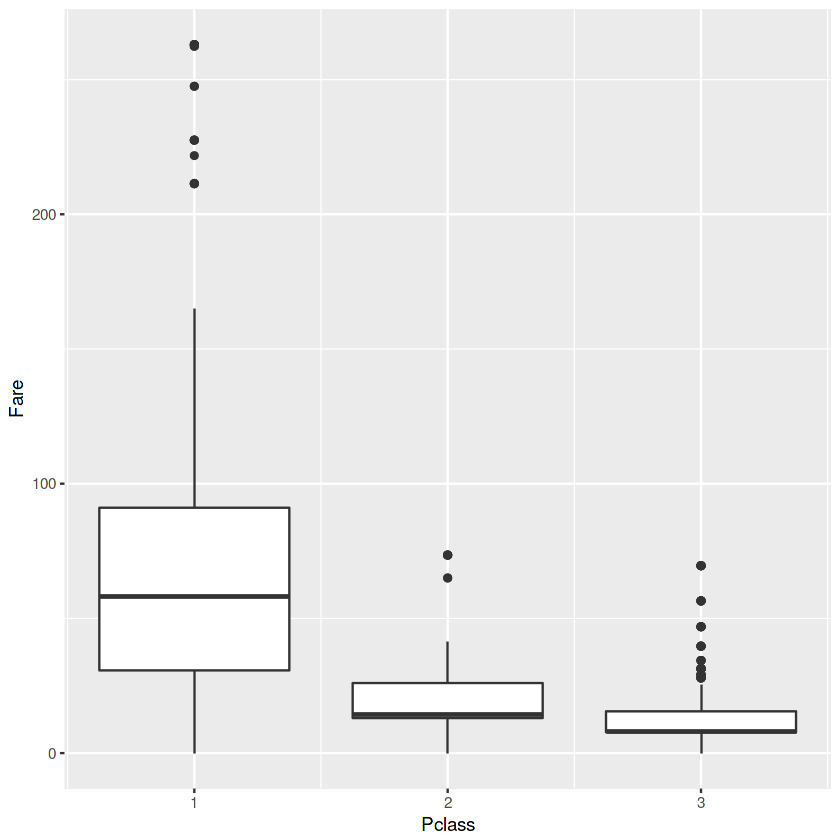

In [46]:
#Let's make a box plot to see how fares are distributed in the 3 classes. 
ggplot(train%>%group_by(Pclass)%>%filter(Fare<500), aes(x=Pclass, y=Fare))+geom_boxplot()

From the plot, we see that clearly that the majority 1st class passengers paid fares that are more than almost all the the lower classes paid, but there are a few outliers. Also, the distinction in fares between 2nd and 3rd class isn't that strict: it looks like the median fare for 2nd class is slightly below the 75 percentile for 3rd class. Let's see how fares correlate with survival.

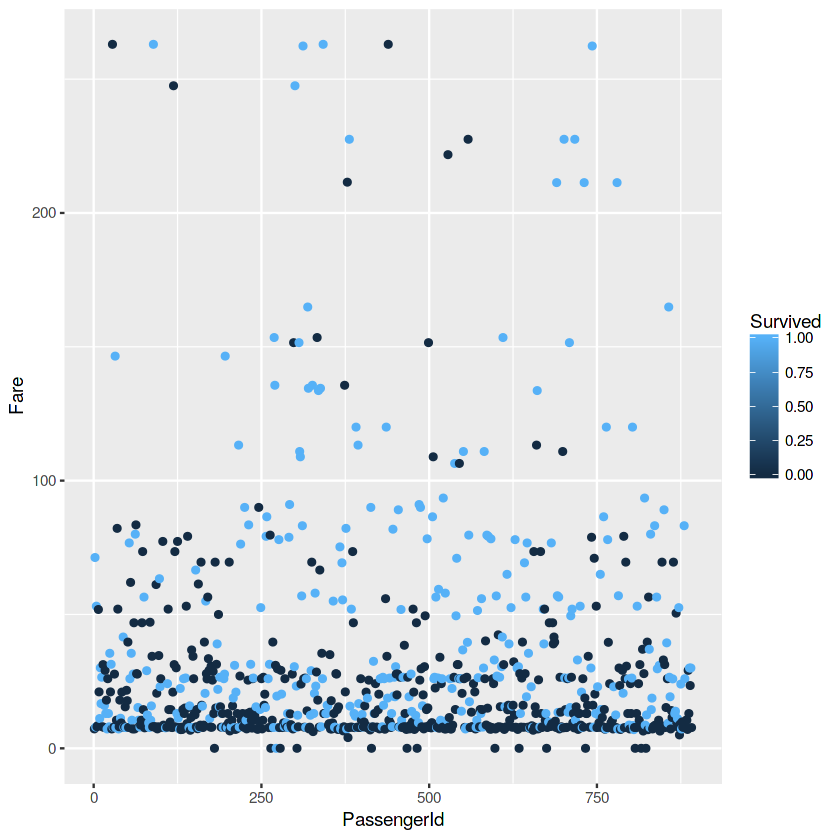

In [47]:
#Build a scatterplot of fares, coloring each dot by whether that passenger survived
ggplot(train%>%filter(Fare<300), aes(x=PassengerId, y=Fare, color = Survived))+geom_point() 
#We have 3 outlier2 who paid 512-pound fares(and all survived), to keep the graph simple we'll exclude them

It looks like definitely the higher fares had a higher chance of survival. Paying anything past 80ish pounds would give pretty good odds, whereas there's a lot of dark blue clustered around the very bottom. Finally, let's plot the different fares vs. the percent of passengers who paid that fare that survived. To keep things simple, we'll round off to the nearest 5 pounds. 

Warning message:
“Transformation introduced infinite values in continuous x-axis”

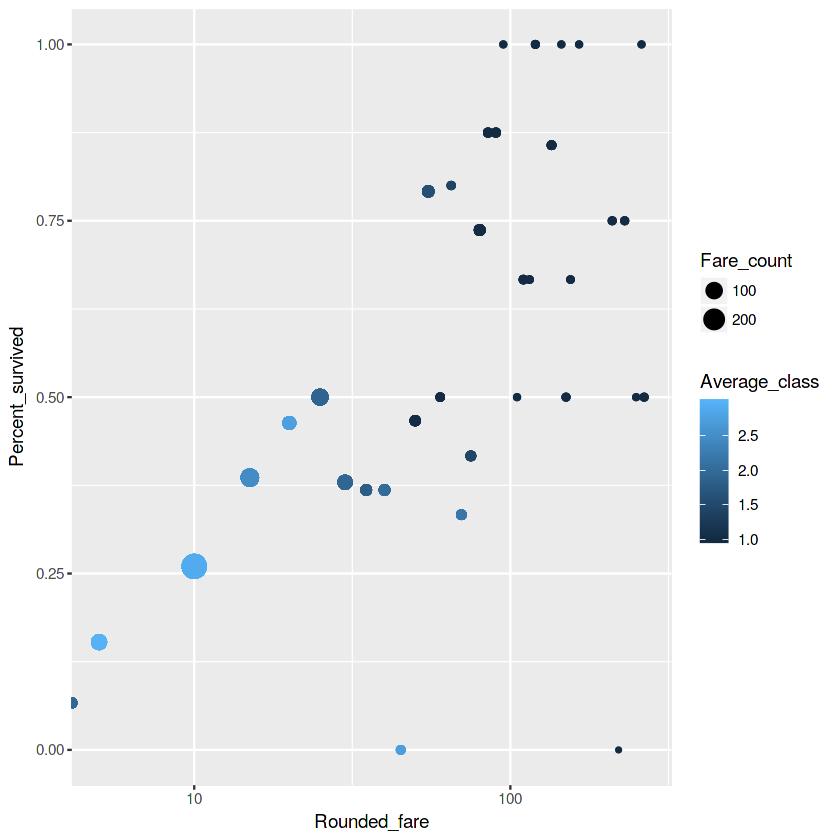

In [48]:
#First group passengers by fare, rounded to the nearest 5 and calculate the percentage chance of survival in each group
fare_groups<-train_tree%>%mutate(Rounded_fare = 5*round(Fare/5))%>%group_by(Rounded_fare)%>%mutate(Percent_survived = length(which(Survived =="Survived"))/n() )
ggplot(fare_groups%>%group_by(Rounded_fare)%>%mutate(Fare_count = n(), Average_class = mean(Pclass))%>%filter(Fare<300), aes(x=Rounded_fare, y=Percent_survived, size = Fare_count, color =Average_class))+
geom_point()+scale_x_log10()

Again, there's a pretty clear trend upwards. Once you've paid at least 100 pounds for a ticket, you have at least even odds of surviving, while if you pay less than 10 your odds are less than 1 in 4. There are two small outlier points with 0 percent surival, but relatively high fares. The first has fares in the 40ish range, but is colored to represent mainly 3rd class passengers. The dot is also sizable, so a number of passengers must fall into that situation.  The second is a much higher fare, but the dot is small, so it probably is just an outlier. Let's just check them out.

In [49]:
fare_groups%>%filter(Rounded_fare<100 & Percent_survived == 0) #It looks like this was mainly a family (with 5 children) who all died together. 
fare_groups%>%filter(Rounded_fare>100 & Percent_survived == 0) #Just an outlier, no extra informations about him

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Rounded_fare,Percent_survived
60,Died,3,"Goodwin, Master. William Frederick",male,11,5,2,CA 2144,46.9,NA,S,45,0
72,Died,3,"Goodwin, Miss. Lillian Amy",female,16,5,2,CA 2144,46.9,NA,S,45,0
84,Died,1,"Carrau, Mr. Francisco M",male,28,0,0,113059,47.1,NA,S,45,0
387,Died,3,"Goodwin, Master. Sidney Leonard",male,1,5,2,CA 2144,46.9,NA,S,45,0
481,Died,3,"Goodwin, Master. Harold Victor",male,9,5,2,CA 2144,46.9,NA,S,45,0
679,Died,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43,1,6,CA 2144,46.9,NA,S,45,0
684,Died,3,"Goodwin, Mr. Charles Edward",male,14,5,2,CA 2144,46.9,NA,S,45,0


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Rounded_fare,Percent_survived
528,Died,1,"Farthing, Mr. John",male,NA,0,0,PC 17483,221.7792,C95,S,220,0


Well, let's continue keeping track of fares, then. Now lets start building our decision tree. 

In [50]:
library(tree)

tree_model1<- tree(Survived ~ Pclass+Age + Sex+ Fare+SibSp, data = train_tree)
summary(tree_model1)


Classification tree:
tree(formula = Survived ~ Pclass + Age + Sex + Fare + SibSp, 
    data = train_tree)
Number of terminal nodes:  7 
Residual mean deviance:  0.7975 = 563.9 / 707 
Misclassification error rate: 0.1737 = 124 / 714 

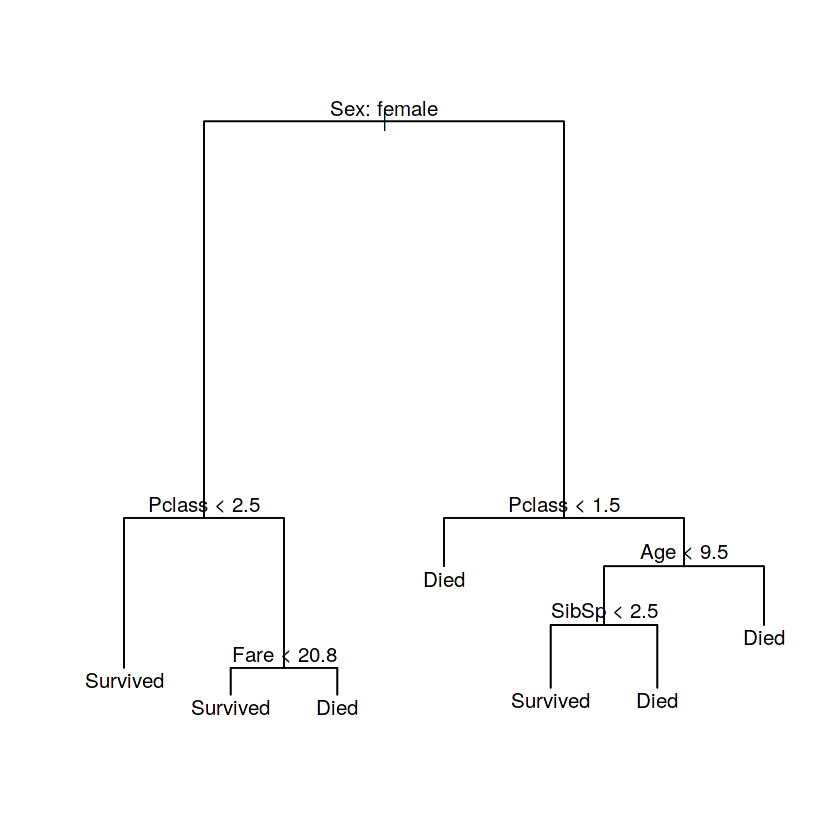

In [51]:
plot(tree_model1)
text(tree_model1, pretty = 0)

In [52]:
#Now prepare the test set to fit the model assumptions, and get predictions on it. 
test_tree<-test%>%mutate(Sex = as.factor(Sex), Embarked = as.factor(Embarked))
tree_pred1<-predict(tree_model1, newdata = test_tree, type = "vector")
head(tree_pred1)

,Died,Survived
1,0.8881988,0.1118012
2,0.4430380,0.5569620
3,0.8881988,0.1118012
4,0.8881988,0.1118012
5,0.4430380,0.5569620
6,0.8881988,0.1118012


In [53]:
submission12<-cbind(test["PassengerId"], as.integer(tree_pred1[,"Survived"]>=0.5))
names(submission12)[2]<-"Survived"

submission12<-submission12%>%mutate(PassengerId = as.integer(PassengerId))
head(submission12)
write_csv(submission12, "submission12.csv")

PassengerId,Survived
892,0
893,1
894,0
895,0
896,1
897,0


Woo! 79%. Finally an improvement over the logistic regression models we've been playing with. Let's see what else we can get from this. First, we note that the tree model we just built did not include the data from passengers whose age values were missing. Again, we can play around with either setting those ages to the mean, or setting them to an actual value of 'missing.'

In [54]:
#Replace missing ages with mean
train_tree_age_mean<-train_tree
train_tree_age_mean$Age[which(is.na(train_tree$Age))]<-mean(train_tree$Age, na.rm = TRUE)

#Build a new model with these data included
tree_model2<- tree(Survived ~ Pclass+Age + Sex+ Fare+SibSp, data = train_tree_age_mean)
summary(tree_model2)


Classification tree:
tree(formula = Survived ~ Pclass + Age + Sex + Fare + SibSp, 
    data = train_tree_age_mean)
Number of terminal nodes:  8 
Residual mean deviance:  0.7973 = 704 / 883 
Misclassification error rate: 0.1695 = 151 / 891 

According to the summary, the misclassification error is about .5% less than the first tree model we made. It's probably worth running the prediction and submitting. First, let's take a look at the tree we got. 

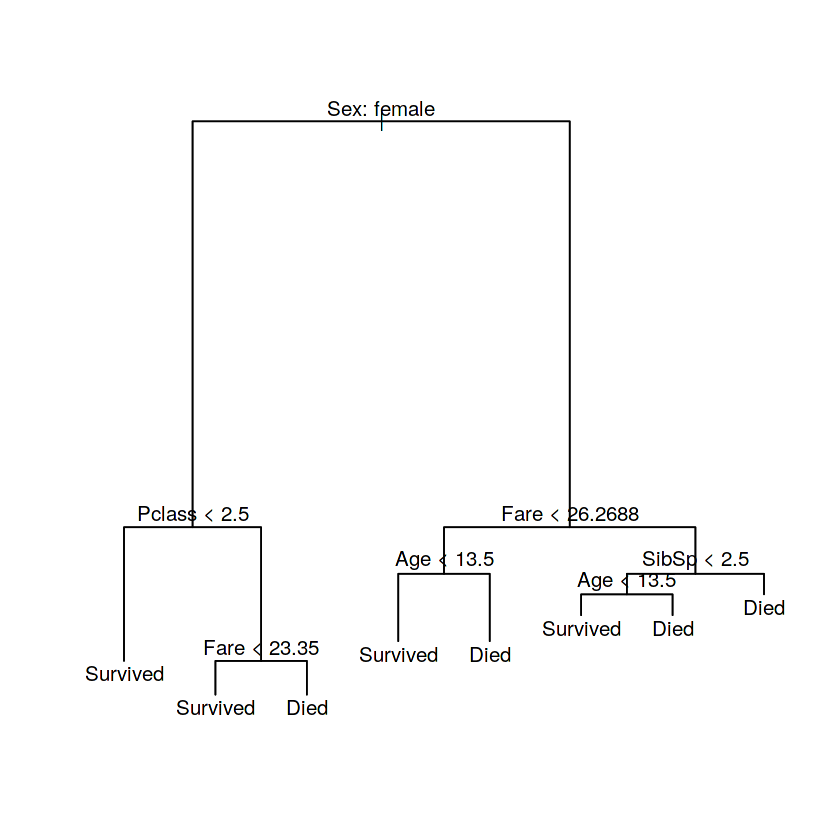

In [55]:
plot(tree_model2)
text(tree_model2, pretty = 0)

In [56]:
#Tree looks good. Let's make the predictions and submit. 
tree_pred2<-predict(tree_model2, newdata = test_tree, type = "vector")

submission13<-cbind(test["PassengerId"], as.integer(tree_pred2[,"Survived"]>=0.5))
names(submission13)[2]<-"Survived"

submission13<-submission13%>%mutate(PassengerId = as.integer(PassengerId))
head(submission13)
write_csv(submission13, "submission13.csv")

PassengerId,Survived
892,0
893,1
894,0
895,0
896,1
897,0


79.4%! Looks like we got 2 more predictions correct. Slow and steady progress! Let's see, just for the sake of checking, how we would do if we left the missing ages missing, but included their missingness as data. We'll need to treat Age as an ordered factor, so let's bring back our Age_bins. Bins of size 5 should be fine. (The tree() funciton won't work if preidctor factors have more than 32 levels)

In [57]:
#Create a new data frame, where Age is rounded off and treated as an ordered factor, with an extra 'none' category
train_tree_age_missing<-train_tree%>%mutate(Age_bin = bin_namer(Age, 5))

#Treat our Age_bin variable as an ordered factor
ages<- c("0 - 5","5 - 10","10 - 15", "15 - 20","20 - 25", "25 - 30","30 - 35", "35 - 40", "40 - 45", "45 - 50", "50 - 55", "55 - 60", "60 - 65", "65 - 70", "70 - 75", "75 - 80", "80 - 85", "NA - NA" )

train_tree_age_missing$Age_bin<-factor(train_tree_age_missing$Age_bin, ordered = TRUE, levels = ages)

test_tree_age_missing<-test_tree%>%mutate(Age_bin = bin_namer(Age, 5))
test_tree_age_missing$Age_bin<-factor(test_tree_age_missing$Age_bin, ordered = TRUE, levels = ages)


Classification tree:
tree(formula = Survived ~ Pclass + Age_bin + Sex + Fare + SibSp, 
    data = train_tree_age_missing)
Variables actually used in tree construction:
[1] "Sex"     "Pclass"  "Fare"    "Age_bin"
Number of terminal nodes:  7 
Residual mean deviance:  0.8116 = 717.5 / 884 
Misclassification error rate: 0.1773 = 158 / 891 

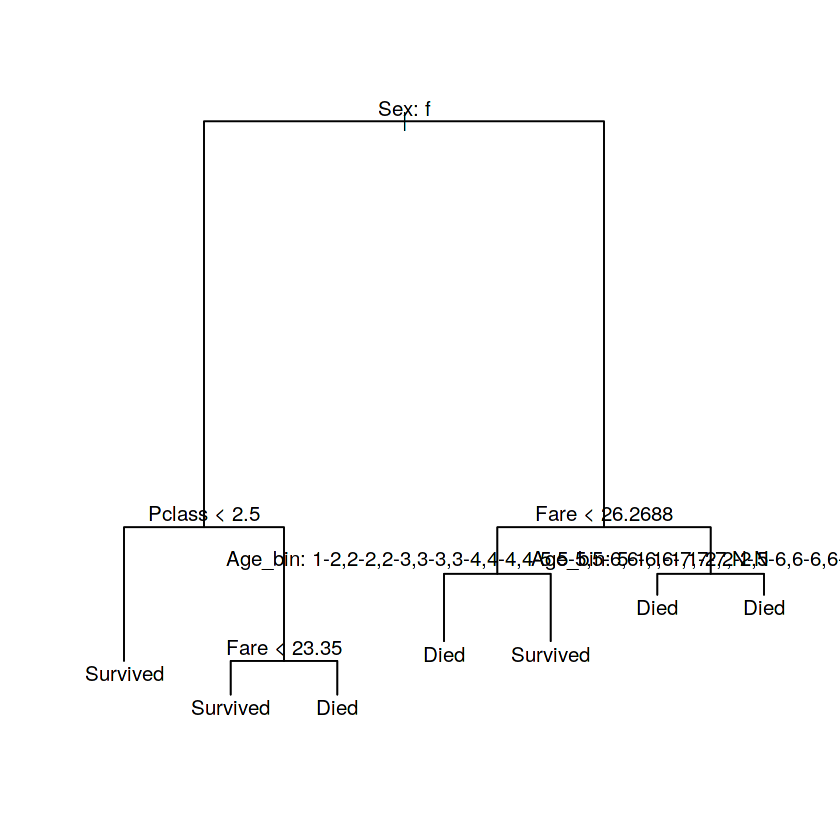

In [58]:
#Build the tree model on this training set, and see how it goes.

tree_model3<- tree(Survived ~ Pclass+Age_bin + Sex+ Fare+SibSp, data = train_tree_age_missing)
summary(tree_model3)
plot(tree_model3)
text(tree_model3, pretty = 1)

It looks like this is doing worse than our earlier models. We can submit it anyway to check, but let's not get our hopes up. 

In [59]:
tree_pred3<-predict(tree_model3, newdata = test_tree_age_missing, type = "vector")

submission14<-cbind(test["PassengerId"], as.integer(tree_pred3[,"Survived"]>=0.5))
names(submission14)[2]<-"Survived"

submission14<-submission14%>%mutate(PassengerId = as.integer(PassengerId))
head(submission14)
write_csv(submission14, "submission14.csv")

PassengerId,Survived
892,0
893,1
894,0
895,0
896,1
897,1


Well, this one did drop us back to 78.9%, which we kind of expected. The tree was also much harder to understand, so we'll keep going with the second model we made. 


Here's something interesting we noticed in the data while looking at the outliers in the fare field:

Although we're missing almost all the data for cabin numbers, just having a cabin number at all increases a passengers chance of survival. (Most of the poorer passengers were likely traveling in steerage, where they would not have cabins assigned). 

In [60]:
#Make a dataframe containing just the passengers with cabins
cabins<-train%>%filter(!is.na(Cabin))
#Percent chance of survival for passengers in cabins
cabins%>%summarize(Percent_Survived = sum(Survived)/n())

Percent_Survived
0.6666667


2/3 of passengers with a cabin survive! That kind of correlation might be worth including in the model. In fact, we can go a little deeper. We don't actually know much about what the cabin numbers mean, but the letter part is likely a section or deck reference, so we can group those in cabins by roughly where there cabin was located. We'll add new fields "Has_cabin" and "Deck", keeping track which passengers have cabins and what decks passengers accomodations are on (if given).



In [61]:
train_tree_cabins<-train_tree_age_mean%>%mutate(Has_cabin = as.integer(!is.na(Cabin)), Deck = Cabin)

train_tree_cabins$Deck[grepl("^A", train_tree_cabins$Cabin)]<-"A"
train_tree_cabins$Deck[grepl("^B", train_tree_cabins$Cabin)]<-"B"
train_tree_cabins$Deck[grepl("^C", train_tree_cabins$Cabin)]<-"C"
train_tree_cabins$Deck[grepl("^D", train_tree_cabins$Cabin)]<-"D"
train_tree_cabins$Deck[grepl("^E", train_tree_cabins$Cabin)]<-"E"
train_tree_cabins$Deck[grepl("^F", train_tree_cabins$Cabin)]<-"F"
train_tree_cabins$Deck[grepl("^G", train_tree_cabins$Cabin)]<-"G"
train_tree_cabins$Deck[is.na(train_tree_cabins$Deck)]<-"none"
head(train_tree_cabins)

train_tree_cabins%>%group_by(Deck)%>%summarize(percent_survived = sum(Survived=="Survived")/n())

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_cabin,Deck
1,Died,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NA,S,0,none
2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00000,1,0,PC 17599,71.2833,C85,C,1,C
3,Survived,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NA,S,0,none
4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S,1,C
5,Died,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NA,S,0,none
6,Died,3,"Moran, Mr. James",male,29.69912,0,0,330877,8.4583,NA,Q,0,none


Deck,percent_survived
A,0.4666667
B,0.7446809
C,0.5932203
D,0.7575758
E,0.7500000
F,0.6153846
G,0.5000000
none,0.2998544
T,0.0000000


We see that different decks have different percentages of surviving passengers, but all of them are much higher than the passengers with no cabin at all. We'll try including this data in our model, although it might not have much effect over the Pclass and Fare variables that are already being included.



Classification tree:
tree(formula = Survived ~ Pclass + Age + Sex + Fare + SibSp + 
    Has_cabin + Deck, data = train_tree_cabins)
Variables actually used in tree construction:
[1] "Sex"    "Pclass" "Fare"   "Deck"   "Age"    "SibSp" 
Number of terminal nodes:  8 
Residual mean deviance:  0.7946 = 701.7 / 883 
Misclassification error rate: 0.1672 = 149 / 891 

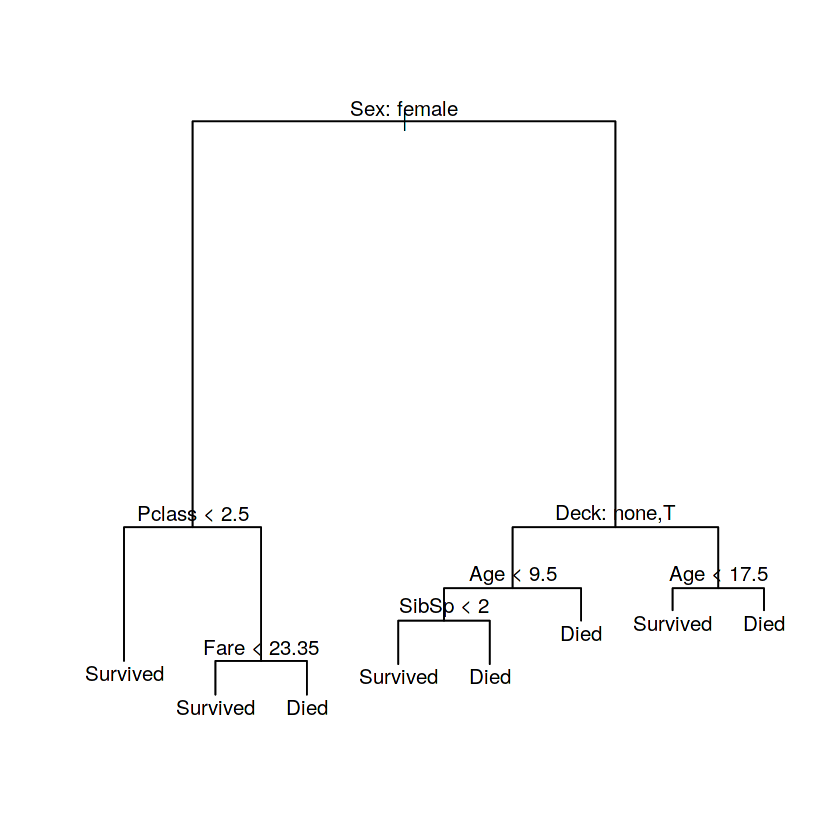

In [62]:
#Turn the Deck and Has_cabin variables into factors
train_tree_cabins$Deck<-factor(train_tree_cabins$Deck, ordered = TRUE, levels = c("none", "T", "G", "F", "E", "D", "C", "B", "A"))
train_tree_cabins$Has_cabin<-factor(train_tree_cabins$Has_cabin, ordered = TRUE, levels = c("0", "1"))

#Build the model
tree_model4<- tree(Survived ~ Pclass+Age + Sex+ Fare+SibSp+Has_cabin+Deck, data = train_tree_cabins)
summary(tree_model4)
plot(tree_model4)
text(tree_model4, pretty = 0)

Alright, looks pretty good. It does slightly better than our best model so far at fitting the training data. It looks like having a cabin or not is an important predictor (although the tree makes the decision as having either no deck or deck T (which is a weird outlier in the Cabin field)). Let's prepare the test set, and then get some predictions on it. 

In [63]:
#Prepare the Has_cabin and Deck fields for the test set
test_tree_cabins<-test_tree%>%mutate(Has_cabin = as.integer(!is.na(Cabin)), Deck = Cabin)

test_tree_cabins$Deck[grepl("^A", test_tree_cabins$Cabin)]<-"A"
test_tree_cabins$Deck[grepl("^B", test_tree_cabins$Cabin)]<-"B"
test_tree_cabins$Deck[grepl("^C", test_tree_cabins$Cabin)]<-"C"
test_tree_cabins$Deck[grepl("^D", test_tree_cabins$Cabin)]<-"D"
test_tree_cabins$Deck[grepl("^E", test_tree_cabins$Cabin)]<-"E"
test_tree_cabins$Deck[grepl("^F", test_tree_cabins$Cabin)]<-"F"
test_tree_cabins$Deck[grepl("^G", test_tree_cabins$Cabin)]<-"G"
test_tree_cabins$Deck[is.na(test_tree_cabins$Deck)]<-"none"

test_tree_cabins$Deck<-factor(test_tree_cabins$Deck, ordered = TRUE, levels = c("none", "T", "G", "F", "E", "D", "C", "B", "A"))
test_tree_cabins$Has_cabin<-factor(test_tree_cabins$Has_cabin, ordered = TRUE, levels = c("0", "1"))


In [64]:
#Get the predictions
tree_pred4<-predict(tree_model4, newdata = test_tree_cabins, type = "vector")

submission15<-cbind(test["PassengerId"], as.integer(tree_pred4[,"Survived"]>=0.5))
names(submission15)[2]<-"Survived"

submission15<-submission15%>%mutate(PassengerId = as.integer(PassengerId))
head(submission15)
write_csv(submission15, "submission15.csv")

PassengerId,Survived
892,0
893,1
894,0
895,0
896,1
897,0


79.9% Moving on up! A few more things to try that might squeeze more accuracy out of this. 

In [65]:
library(randomForest)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:dplyr’:

    combine

The following object is masked from ‘package:ggplot2’:

    margin



In [66]:
#Prepare the training set by removing extraneous variables
train_tree_cabins_nona<-train_tree_cabins[,c("PassengerId","Survived", "Pclass","Age","Sex", "Fare", "SibSp","Has_cabin","Deck")]

#Build a random forest
rf_model<-randomForest(Survived~.-PassengerId, data=train_tree_cabins_nona)


Call:
 randomForest(formula = Survived ~ . - PassengerId, data = train_tree_cabins_nona) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 17.96%
Confusion matrix:
         Died Survived class.error
Died      486       63   0.1147541
Survived   97      245   0.2836257

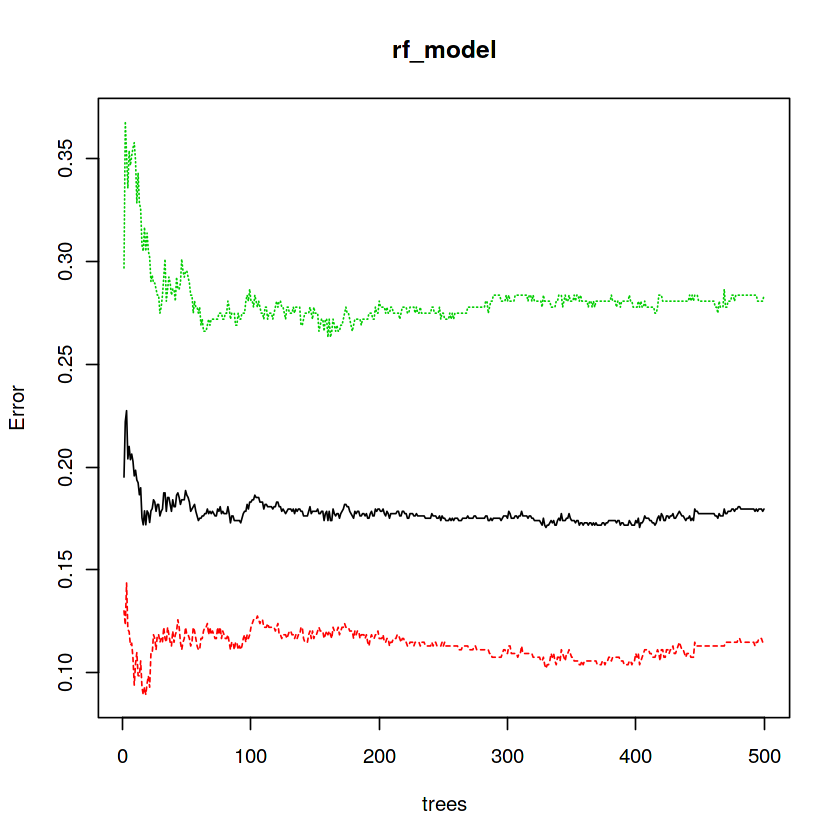

In [67]:
rf_model
plot(rf_model)


In [68]:
#Make predictions on the test data.
#First, fill in the missing Fare and Age values in the test data
test_tree_cabins_nona<-test_tree_cabins
test_tree_cabins_nona$Fare[is.na(test_tree_cabins$Fare)]<-median(filter(test_tree_cabins, Pclass ==  3)$Fare, na.rm=TRUE)
test_tree_cabins_nona$Age[is.na(test_tree_cabins$Age)]<-mean(test_tree_cabins$Age, na.rm=TRUE)
test_tree_cabins_nona<-test_tree_cabins_nona%>%mutate(Survived = as.factor("unknown"))
test_tree_cabins_nona<-test_tree_cabins_nona[,c("PassengerId", "Survived", "Pclass","Age","Sex", "Fare", "SibSp","Has_cabin","Deck")]
#Now, get the predictions
test_pred_rf<-predict(rf_model, newdata = test_tree_cabins_nona, type = "prob")

head(test_pred_rf)

,Died,Survived
1,0.994,0.006
2,0.672,0.328
3,0.890,0.110
4,0.952,0.048
5,0.490,0.510
6,0.854,0.146


In [69]:
#Prepare the submission
submission16<-cbind(test["PassengerId"], as.integer(test_pred_rf[,"Survived"]>=0.5))
names(submission16)[2]<-"Survived"

submission16<-submission16%>%mutate(PassengerId = as.integer(PassengerId))
head(submission16)
write_csv(submission16, "submission16.csv")
length(which(submission15$Survived!=submission16$Survived))

PassengerId,Survived
892,0
893,0
894,0
895,0
896,1
897,0


[1] 27

Now let's try using some Xtreme Gradient Boosting (xgboost).

In [70]:
#XGBOOST
library(xgboost)

#Now, prepare our data into a Dmatrix, so we can build an xgboost model on it. All the data needs to be numeric,
#and we need to remove any fields we're not planning on using. 

xgb_train<-train_tree_cabins%>%select("Pclass","Age","Sex", "Fare", "SibSp", "Has_cabin", "Deck")
xgb_train_labels<-train[,"Survived"]
#deck<-model.matrix(~Deck-1,xgb_train)

#Right now, Sex, Has_cabin, and Deck are all factors instead of numbers, but we can easily convert them
xgb_train<-xgb_train%>%mutate(Is_female = as.numeric(Sex=="female"), Has_cabin = as.numeric(Has_cabin)-1, Deck_number = as.numeric(Deck)-1)%>%select(-c(Sex,Deck))

#xgb_train<-cbind(xgb_train, deck)

str(xgb_train)
str(xgb_train_labels)



Attaching package: ‘xgboost’

The following object is masked from ‘package:dplyr’:

    slice



Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	891 obs. of  7 variables:
 $ Pclass     : num  3 1 3 1 3 3 1 3 3 2 ...
 $ Age        : num  22 38 26 35 35 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ SibSp      : num  1 1 0 1 0 0 0 3 0 1 ...
 $ Has_cabin  : num  0 1 0 1 0 0 1 0 0 0 ...
 $ Is_female  : num  0 1 1 1 0 0 0 0 1 1 ...
 $ Deck_number: num  0 6 0 6 0 0 4 0 0 0 ...
Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	891 obs. of  1 variable:
 $ Survived: num  0 1 1 1 0 0 0 0 1 1 ...


In [71]:
#Convert our dataframes to matrices, and then to a DMatrix
xgb_train_matrix <- data.matrix(xgb_train)
xgb_train_labels<-data.matrix(xgb_train_labels)
dtrain<-xgb.DMatrix(data = xgb_train_matrix, label= xgb_train_labels)

#Now build the model
modelxgb <- xgboost(data = dtrain, nround = 5, objective = "binary:logistic")


[1]	train-error:0.139169 
[2]	train-error:0.133558 
[3]	train-error:0.132435 
[4]	train-error:0.127946 
[5]	train-error:0.125701 


In [72]:
#Now we prepare the test data the same way, and then make predictions. 
xgb_test<-test_tree_cabins%>%select("Pclass","Age","Sex", "Fare", "SibSp","Has_cabin","Deck")
#test_deck<-model.matrix(~Deck-1,xgb_test)
xgb_test<-xgb_test%>%mutate(Is_female = as.numeric(Sex=="female"), Has_cabin = as.numeric(Has_cabin)-1, Deck_number = as.numeric(Deck)-1)%>%select(-c(Sex, Deck))
xgb_test$Age[which(is.na(xgb_test$Age))]<-mean(xgb_test$Age, na.rm = TRUE)
#xgb_test<-cbind(xgb_test, test_deck)
xgb_test_matrix <- data.matrix(xgb_test)
dtest<-xgb.DMatrix(data = xgb_test_matrix)

#Make predictions
test_pred_xgb<-predict(modelxgb, newdata = dtest)

In [73]:
#Prepare the submission
submission17<-cbind(test["PassengerId"], as.integer(test_pred_xgb>=0.5))
names(submission17)[2]<-"Survived"

submission17<-submission17%>%mutate(PassengerId = as.integer(PassengerId))
head(submission17)
write_csv(submission17, "submission17.csv")


PassengerId,Survived
892,0
893,0
894,0
895,0
896,1
897,0


There's a naive xgboost model. It doesn't do better than the decision tree we came up with before, but there are various ways to try to tune it. Let's try some things.

First, let's split off some of our training data to use in cross-validation. That way we won't have to keep submitting our guesses to see if we're improving, and we'll get some feedback on the mistakes we're making. 

In [74]:
#Randomize a split into a training and crossval set
set.seed(111)
permutation<-sample(nrow(train))
xgb_train_permuted<-xgb_train_matrix[permutation,]
xgb_train_labels_permuted<-xgb_train_labels[permutation,]
head(xgb_train_permuted)

Pclass,Age,Fare,SibSp,Has_cabin,Is_female,Deck_number
3,39.00000,7.9250,0,0,0,0
3,19.00000,7.8958,0,0,0,0
1,16.00000,57.9792,0,1,1,7
1,29.69912,51.8625,1,1,1,5
1,29.69912,133.6500,1,0,1,0
1,25.00000,55.4417,1,1,0,4


In [75]:
dtrain<-xgb_train_permuted[1:624,]
dcross<-xgb_train_permuted[625:891,]
dtrain_labels<-xgb_train_labels_permuted[1:624]
dcross_labels<-xgb_train_labels_permuted[625:891]

dtrain<-xgb.DMatrix(data = dtrain, label= dtrain_labels)
dcross<-xgb.DMatrix(data = dcross, label = dcross_labels)

In [76]:
#Now build some models
negatives<- sum(dtrain_labels == FALSE)
positives <- sum(dtrain_labels == TRUE)

modelxgb_tune1 <- xgboost(data = dtrain, nround = 11, max.depth = 6, early_stopping_rounds = 3,
                    objective = "binary:logistic", 
                    scale_pos_weight = negatives/positives
                         )


#Predict against our crossval set, and see how it does
cross_pred_tune1<-predict(modelxgb_tune1, newdata = dcross)
err <- mean(as.numeric(cross_pred_tune1 > 0.5) != dcross_labels)
print(paste("test-error=", err))
print(positives)
print(negatives)

[1]	train-error:0.128205 
Will train until train_error hasn't improved in 3 rounds.

[2]	train-error:0.131410 
[3]	train-error:0.115385 
[4]	train-error:0.120192 
[5]	train-error:0.112179 
[6]	train-error:0.108974 
[7]	train-error:0.110577 
[8]	train-error:0.107372 
[9]	train-error:0.110577 
[10]	train-error:0.102564 
[11]	train-error:0.099359 
[1] "test-error= 0.149812734082397"
[1] 236
[1] 388


In [ ]:
xgb.plot.multi.trees(feature_names = names(xgb_train_matrix), model = modelxgb_tune1)
importance_matrix <- xgb.importance(names(xgb_train_matrix), model = modelxgb_tune1)

xgb.plot.importance(importance_matrix)

In [ ]:
#Make predictions
test_pred_xgb_tune1<-predict(modelxgb_tune1, newdata = dtest)
submission18<-cbind(test["PassengerId"], as.integer(test_pred_xgb_tune1>=0.5))
names(submission18)[2]<-"Survived"

submission18<-submission18%>%mutate(PassengerId = as.integer(PassengerId))
head(submission18)
write_csv(submission18, "submission18.csv")

which(submission15$Survived!=submission18$Survived)